In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))
import pyabc
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from pyabc.examples import multiplebivariategauss
from pyabc.plots import plot_marginals, plot_pairs
from pyabc.prior import PriorList

### 20 bivariate Gaussians

In [2]:
np.random.seed(1337)

# data parameters
def generateMus(size):
    mus = [None] * size 
    for i in range(size):
        mus[i] = [np.random.randint(0,10), np.random.randint(0,10)]
    return mus
    

mus = generateMus(10)
N = 50
mus

[[7, 8],
 [7, 9],
 [7, 2],
 [2, 4],
 [8, 9],
 [6, 6],
 [7, 8],
 [1, 6],
 [6, 2],
 [2, 9]]

In [3]:
# prior parameters
prior_mu = pyabc.Prior('uniform', 0, 10, name='mu')

prior_mus = [prior_mu] * 20


simulator = multiplebivariategauss.MultipleBivariateGauss.simulator
#distance = multiplebivariategauss.MultipleBivariateGauss._distance
summary = multiplebivariategauss.MultipleBivariateGauss.summaries

mus = np.array(mus)
x = simulator(*mus.flatten())

def distance(s1,s2):
    diff = s1 - s2 
    rmsd = np.mean(diff*diff)
    return np.sqrt(rmsd) 

x

array([[[ 6.99961955,  8.00324028],
        [ 7.0062418 ,  8.00614502],
        [ 6.98901731,  7.98183799],
        [ 7.01477996,  8.00478658],
        [ 6.99404055,  7.99121718],
        [ 6.9999571 ,  8.0207607 ],
        [ 6.9966732 ,  7.98768877],
        [ 7.001486  ,  7.98589888],
        [ 6.99591404,  8.00431472],
        [ 6.99911248,  8.00544229],
        [ 7.03640089,  8.01392995],
        [ 6.99689351,  7.99073344],
        [ 6.99448362,  7.9983654 ],
        [ 6.99397291,  8.01160785],
        [ 6.99917777,  8.01898551],
        [ 7.01180161,  8.02016427],
        [ 6.97864024,  7.99885611],
        [ 7.00757659,  8.01149082],
        [ 7.00562366,  7.98954234],
        [ 6.99735557,  8.00618157],
        [ 6.98942904,  8.00902728],
        [ 6.9868064 ,  8.00077553],
        [ 6.9753912 ,  7.98449565],
        [ 7.01303246,  7.99536   ],
        [ 7.0179116 ,  7.99947198],
        [ 6.99414088,  8.01156321],
        [ 7.00260466,  8.00501207],
        [ 6.99819396,  8.008

In [4]:
rej = pyabc.RejectionSampler(
    priors=prior_mus,
    simulator=simulator,
    summaries=summary,
    distance=distance,
    observation=x
)

smc = pyabc.SMCSampler(
    priors=prior_mus,
    simulator=simulator,
    summaries=summary,
    distance=distance,
    observation=x
)

mcmc = pyabc.MCMCSampler(
    priors=prior_mus,
    simulator=simulator,
    summaries=summary,
    distance=distance,
    observation=x
)

abcde = pyabc.ABCDESampler(
    priors=prior_mus,
    simulator=simulator,
    summaries=summary,
    distance=distance,
    observation=x
)

"""
bolfi = pyabc.BOLFI(
    priors=prior_mus,
    simulator=simulator,
    summaries=summary,
    distance=root_mean_squared_difference,
    observation=x,
    domain = [(0,10)] * 20
)
"""

'\nbolfi = pyabc.BOLFI(\n    priors=prior_mus,\n    simulator=simulator,\n    summaries=summary,\n    distance=root_mean_squared_difference,\n    observation=x,\n    domain = [(0,10)] * 20\n)\n'

In [5]:
rej.sample(threshold=1, nr_samples=50, batch_size = 100)

Rejection sampler started with threshold: 1 and number of samples: 50


KeyboardInterrupt: 

In [232]:
rej.simtime

281.9356349999979

In [12]:
smc.sample(thresholds=[5, 3, 1, 0.5, 0.2, 0.1], nr_samples=50)

SMC sampler started with thresholds: [5, 3, 1, 0.5, 0.2, 0.1] and number of samples: 50
Iteration 0 completed
starting iteration[ 1 ]
Iteration 1 completed
starting iteration[ 2 ]


KeyboardInterrupt: 

In [27]:
smc.simtime

5.324583999999943

In [28]:
mcmc.sample(threshold = 0.1, nr_samples=50, step_size = [0.1] * 20)

MCMC sampler started with threshold: 0.1 and number of samples: 50
Samples:     50 - Threshold: 0.1000 - Iterations:        108 - Acceptance rate: 0.462963 - Time:     7.10 s


In [12]:
abcde.sample(nr_samples=50, nr_groups = 1, nr_iter = 500, burn_in = 300, alpha = 0.0, beta = 0.0, kappa = 1.0)

ABC-Differential-Evolution sampler started with number of samples: 50
initializing pools
starting iteration [ 100 ]
starting iteration [ 200 ]
starting iteration [ 300 ]
starting iteration [ 400 ]
Samples:     50 - Iterations:        500 - Acceptance rate: None - Time:  1232.35 s


In [6]:
np.mean(abcde.Thetas,axis=0)

array([ 6.14371101,  5.4795258 ,  5.54547303,  5.17007326,  4.4409625 ,
        4.9736871 ,  5.08937916,  4.95605258,  4.73419263,  4.6922266 ,
        4.90763848,  5.47909137,  5.2163043 ,  5.62194628,  4.92134963,
        4.39975995,  5.3375907 ,  4.81729884,  4.40222835,  4.5088274 ])

In [14]:
abcde.distances[0] - abcde.distances[499]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [109]:
import scipy.stats as ss




abcde.calculate_fitness(abcde.particles[99][0][0],abcde.distances[99,:,0][0])



delta = abcde.particles[99][0][1][20]

prior_mus = PriorList([prior_mu] * 20)

#prior_mus.pdf(abcde.particles[99][0][1][0:20])


delta = abcde.particles[0,0,0][20]
normal = ss.norm(0,delta)
dist = abcde.distances[0,:,0][0]


print('prior value', prior_mus.pdf(abcde.particles[0,0,0][0:20]))
print('delta:',delta)
print('distance:', dist)
print('error distribution:' , normal.pdf(dist))
print('error distribution log:' ,normal.logpdf(dist))




prior value 1e-20
delta: 0.0250338652293
distance: 3.87810459822
error distribution: 0.0
error distribution log: -11996.457092


array([[ 8.48820467]])

In [114]:
expon_prior_1 = pyabc.Prior('expon', 0, 20, name="delta")
print(expon_prior_1.sample(10))
print(expon_prior_1.pdf(20))
print(expon_prior_1.pdf(0.01))

expon_prior_2 = pyabc.Prior('expon', 0, 1/20, name="delta")
print(expon_prior_2.sample(10))
print(expon_prior_2.pdf(20))
print(expon_prior_2.pdf(0.01))


[[  7.00866307]
 [ 14.42970148]
 [  5.90357323]
 [ 15.26374505]
 [  2.45420012]
 [ 13.84229021]
 [ 38.53877463]
 [ 22.66160372]
 [  2.93663591]
 [  5.68386533]]
0.0183939720586
0.049975006249
[[ 0.06375934]
 [ 0.07654685]
 [ 0.06583801]
 [ 0.05545249]
 [ 0.06143284]
 [ 0.06151373]
 [ 0.0479435 ]
 [ 0.02717068]
 [ 0.06038432]
 [ 0.15061749]]
3.83033919343e-173
16.3746150616


<IPython.core.display.Javascript object>


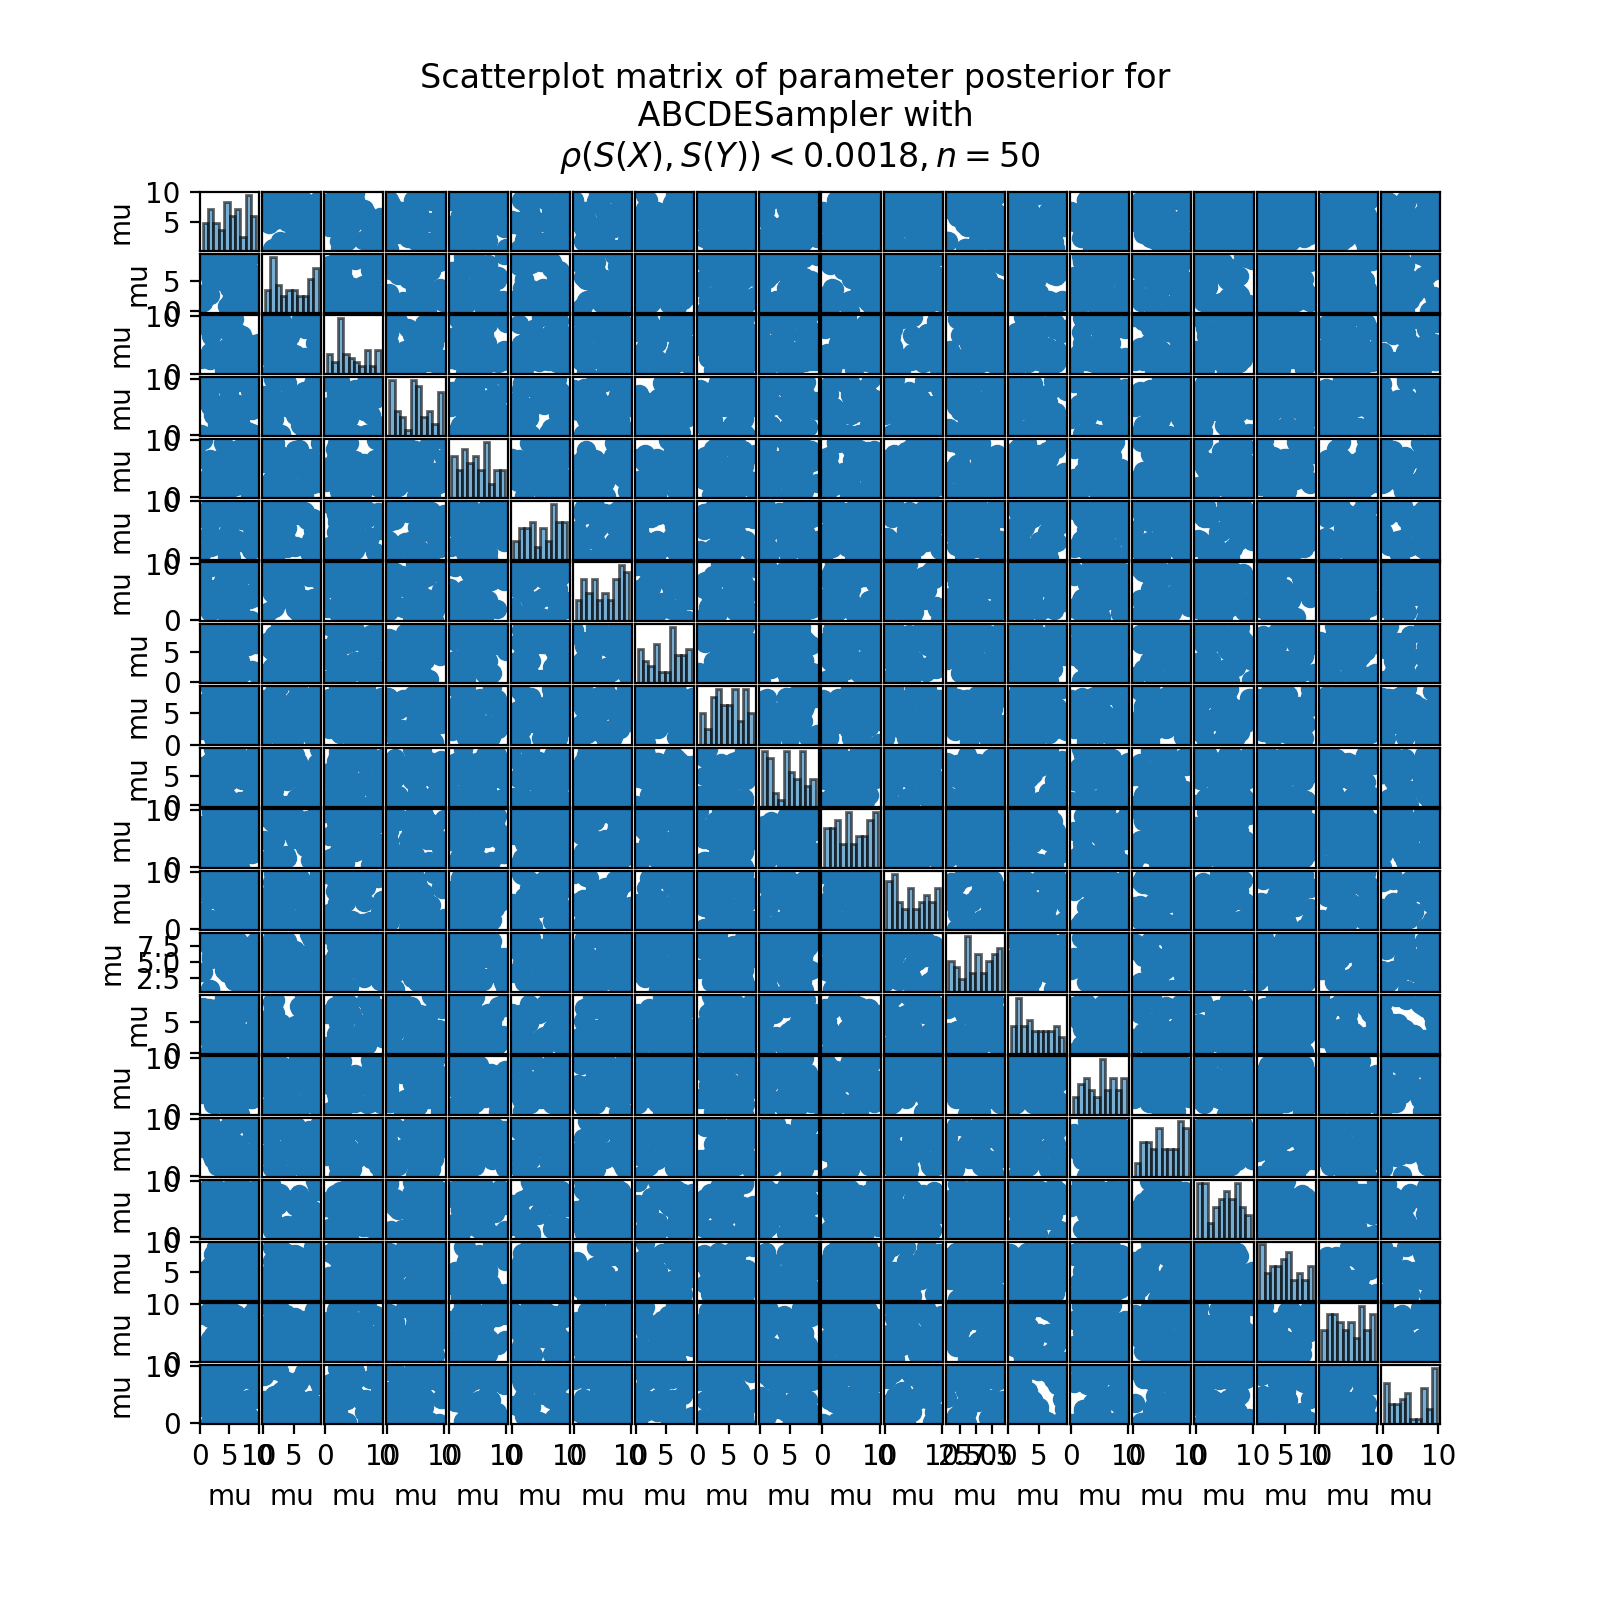

In [56]:
f = plot_pairs(abcde, hist_kwds={"edgecolor":"k", "alpha": 0.6}, diagonal ='hist')

<IPython.core.display.Javascript object>


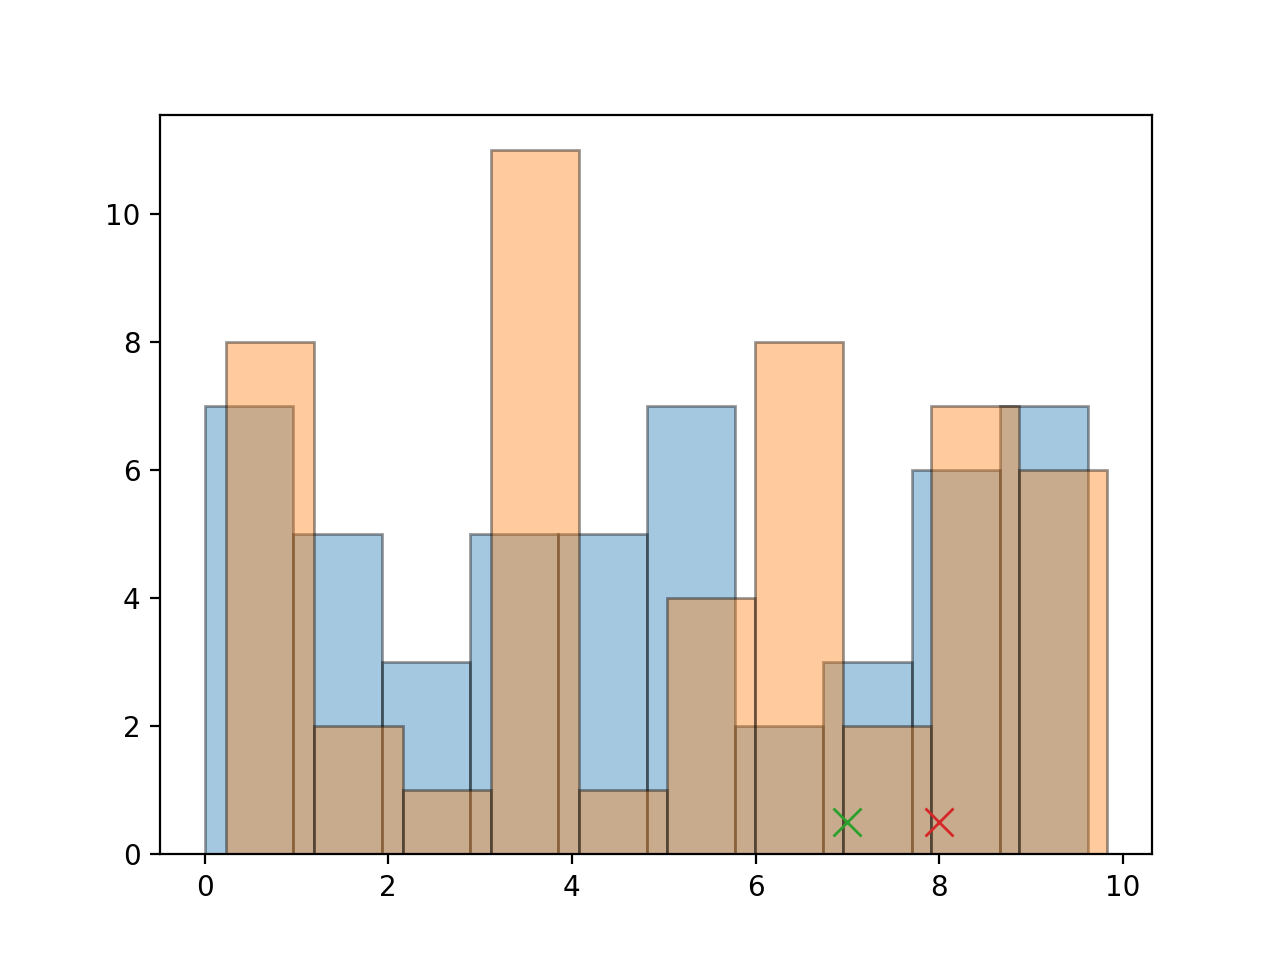

In [15]:
plt.figure()

plt.hist(abcde.Thetas[:,0], alpha=0.4, edgecolor="k")
plt.hist(abcde.Thetas[:,1], alpha=0.4, edgecolor="k")
plt.plot(mus[0][0], 0.5, "x", markersize=10)
plt.plot(mus[0][1], 0.5, "x", markersize=10)

array([[  0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+000,   1.61242611e-096,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          3.30481945e-217,   0.00000000e+000,   0.00000000e+000,
          2.13267624e-164,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+000,   9.22848337e-082,
          0.00000000e+000,   0.00000000e+000,   8.59861511e-188,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          1.72284654e-152,   6.01963172e-226,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000,   3.93245923e-106,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000,   2.47367761e-049,   0.00000000e+000,
          0.00000000e+000

array([ 3.58995517])

7.9508994718172926e-30

In [47]:



abcde.calculate_fitness(curr_theta=abcde.Thetas[0],distance=abcde.distances[299,:,0][0])

IndexError: tuple index out of range